In [1]:
import pandas as pd 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv(r'inference/testExportV2Front/testExportV2Front_Rasterspace.csv')
df_array1 = df1.to_numpy(dtype='float32')
df_array1 = df_array1.reshape(df_array1.shape[0],df_array1.shape[1]//2,2)

In [14]:
pred_openpose = np.load(r'data/openpose_testExportV2Front.mp4.npz',allow_pickle=True)
pred_openpose = pred_openpose['positions_2d'].item()
pred_openpose_array = pred_openpose['testExportV2Front.mp4']['custom'][0]

In [19]:
pred_detectron = np.load(r'data/detectron_testExportV2Front.mp4.npz',allow_pickle=True)
pred_detectron = pred_detectron['positions_2d'].item()
pred_detectron_array = pred_detectron['testExportV2FullFront.mp4']['custom'][0]

In [20]:
print (pred_detectron_array.shape)
print (df_array1.shape)

(61, 17, 2)
(61, 14, 2)


In [21]:
print ('left_hip')
print (np.mean(pred_detectron_array[:,11,0]))
print (np.mean(pred_detectron_array[:,11,1]))

print ('right_hip')
print (np.mean(pred_detectron_array[:,12,0]))
print (np.mean(pred_detectron_array[:,12,1]))



left_hip
339.95532
375.9111
right_hip
256.97226
371.18155


In [22]:
print ('left_hip')

print (np.mean(df_array1[:,0,0]))
print (np.mean(df_array1[:,0,1]))
print ('right_hip')
print (np.mean(df_array1[:,1,0]))
print (np.mean(df_array1[:,1,1]))

left_hip
346.04367
385.8002
right_hip
249.71376
385.4665


Size of: 800 x 600


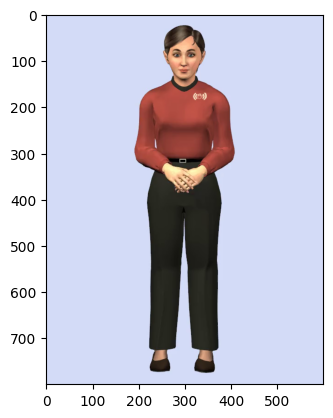

In [23]:
img = cv2.imread("frame0.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print ('Size of:',img.shape[0],'x',img.shape[1])
plt.imshow(img)
plt.show()

In [24]:
keypoints2D_detectron = ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder','right_shoulder','left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip',
'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']
gt_2d = ['leftfemur', 'rightfemur', 'waist', 'upperspine', 'rightshoulder', 'rightelbow', 'rightwrist', 'leftshoulder', 'leftelbow',
 'leftwrist', 'neck', 'headbase', 'sphnosetip', 'sphheadtop']

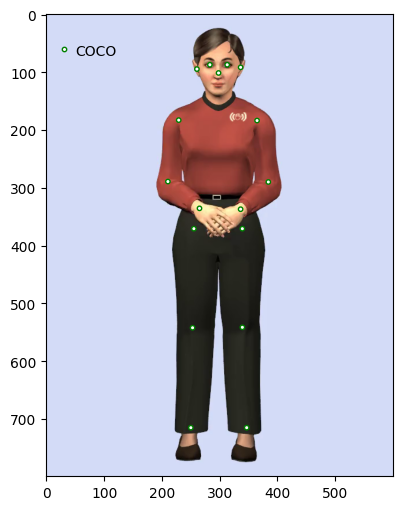

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
'''
colors_2d = np.full(df_array1.shape[1], 'black')
#colors_2d[joints_right_2d] = 'red'
ax.scatter(*df_array1[0].T,10, color=colors_2d, edgecolors='white', zorder=10)
ax.scatter(30,40,10, color=colors_2d[0], edgecolors='white', zorder=10)
ax.text(50,50,'GT')
'''
colors_2d = np.full(pred_detectron_array.shape[1], 'white')
ax.scatter(*pred_detectron_array[0].T,10, color=colors_2d, edgecolors='green', zorder=10)
ax.scatter(30,60,10, color=colors_2d[0], edgecolors='green', zorder=10)
ax.text(50,70,'COCO')
plt.savefig('fullbody_detectron.png')
plt.show()


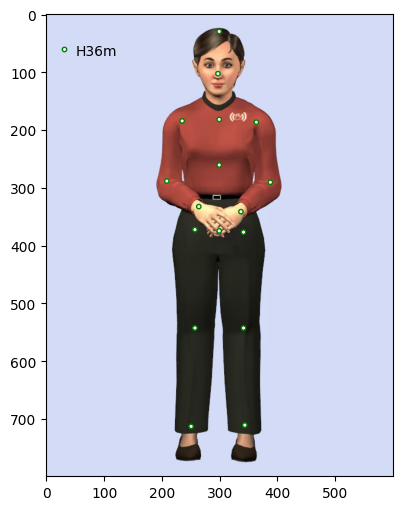

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)
colors_2d = np.full(pred_openpose_array.shape[1], 'white')
ax.scatter(*pred_openpose_array[0].T,10, color=colors_2d, edgecolors='green', zorder=10)
ax.scatter(30,60,10, color=colors_2d[0], edgecolors='green', zorder=10)
ax.text(50,70,'H36m')
plt.savefig('fullbody_openpose.png')
plt.show()

In [2]:
df = pd.read_csv(r'../VideoPose/testMultipleViewsFront_Rasterspace_13kps.csv')
df_array = df.to_numpy(dtype='float32')
df_array = df_array.reshape(df_array.shape[0],df_array.shape[1]//2,2)
df_array.shape

(76, 14, 2)

In [3]:
openpose = np.load(r'../VideoPose/data/openpose_h36m_kps.npy',allow_pickle=True)
openpose.shape

(76, 13, 2)

Size of: 800 x 600


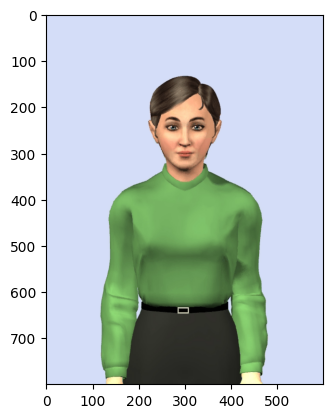

In [4]:
img2 = cv2.imread(r'../VideoPose/frame0.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print ('Size of:',img2.shape[0],'x',img2.shape[1])
plt.imshow(img2)
plt.show()

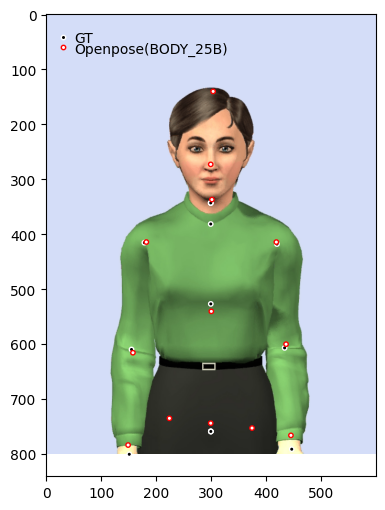

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img2)
colors_2d = np.full(df_array.shape[1], 'black')
#colors_2d[joints_right_2d] = 'red'
ax.scatter(*df_array[0].T,10, color=colors_2d, edgecolors='white', zorder=10)
ax.scatter(30,40,10, color=colors_2d[0], edgecolors='white', zorder=10)
ax.text(50,50,'GT')

colors_2d = np.full(openpose.shape[1], 'white')
ax.scatter(*openpose[0].T,10, color=colors_2d, edgecolors='red', zorder=10)
ax.scatter(30,60,10, color=colors_2d[0], edgecolors='red', zorder=10)
ax.text(50,70,'Openpose(BODY_25B)')
plt.savefig('upperbody.png')
plt.show()


In [1]:
import cv2
import pandas
import matplotlib.pyplot as plt
import numpy as np
video_path = r'inference/testExportV2Front/detectron_predictions/output.mp4'

vcap = cv2.VideoCapture(video_path)
if vcap.isOpened(): 
    nx = vcap.get(cv2.CAP_PROP_FRAME_WIDTH)
    ny = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    success,image = vcap.read()
    cv2.imwrite('frame0.png', image)
      # save frame as PNG file      


Size of: 800 x 600


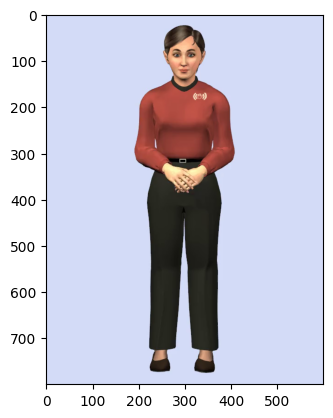

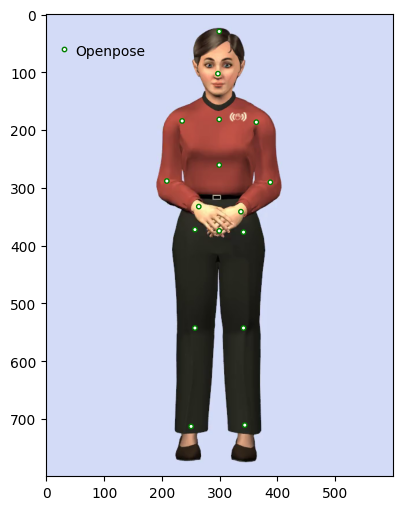

In [21]:
img2 = cv2.imread(r'frame0.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print ('Size of:',img2.shape[0],'x',img2.shape[1])
plt.imshow(img2)
plt.show()
df_array1 = np.load(r'inference/testExportV2Front/openpose.npy')

PycharmProjects/Videopose_FullBody/inference/testExportV2Front/openpose_predictions/output.mp4
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img2)
colors_2d = np.full(df_array1.shape[1], 'white')
ax.scatter(*df_array1[0].T,10, color=colors_2d, edgecolors='green', zorder=10)
ax.scatter(30,60,10, color=colors_2d[0], edgecolors='green', zorder=10)
ax.text(50,70,'Openpose')
plt.savefig('fullbody_openpose.png')
plt.show()

Size of: 800 x 600


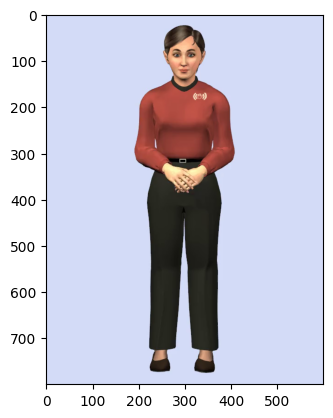

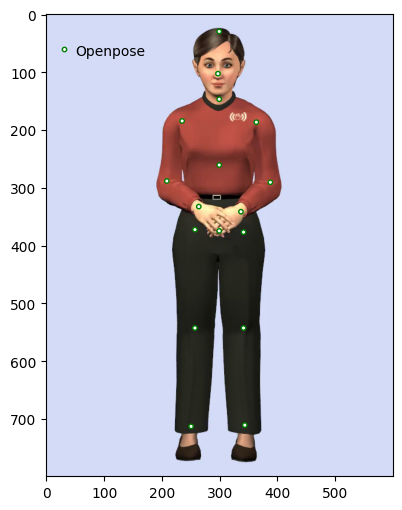

In [3]:
df_array1 = np.load(r'inference/testExportV2Front/openpose.npy')

img2 = cv2.imread(r'frame0.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print ('Size of:',img2.shape[0],'x',img2.shape[1])
plt.imshow(img2)
plt.show()
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img2)
colors_2d = np.full(df_array1.shape[1], 'white')
ax.scatter(*df_array1[0].T,10, color=colors_2d, edgecolors='green', zorder=10)
ax.scatter(30,60,10, color=colors_2d[0], edgecolors='green', zorder=10)
ax.text(50,70,'Openpose')
#plt.savefig('fullbody_openpose.png')
plt.show()